<a href="https://colab.research.google.com/github/shalinikumari123/K-Means/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/shalinikumari123/K-Means/main/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().values.any()

False

In [7]:
df.describe(include=object)

,Gender
count,200
unique,2
top,Female
freq,112


In [8]:
df_corr = df.corr()
df_corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

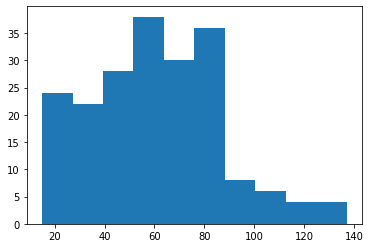

In [10]:
import matplotlib
import matplotlib.pyplot as plt

plt.hist(df['Annual Income (k$)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

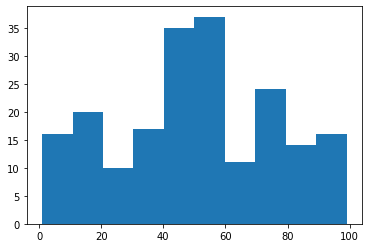

In [11]:
plt.hist(df['Spending Score (1-100)'])

(array([50., 63., 42., 25., 20.]),
 array([18. , 28.4, 38.8, 49.2, 59.6, 70. ]),
 <a list of 5 Patch objects>)

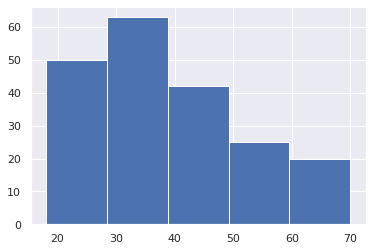

In [21]:
plt.hist(df['Age'],bins=5)

<BarContainer object of 200 artists>

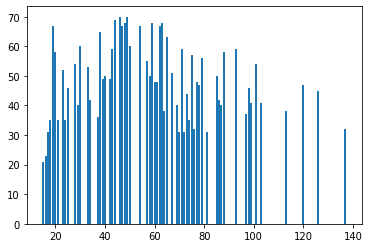

In [14]:
plt.bar(df['Annual Income (k$)'],df['Age'])

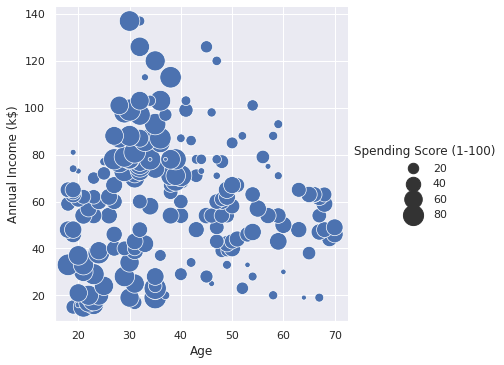

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.relplot(x=df['Age'],y=df['Annual Income (k$)'],size=df["Spending Score (1-100)"],sizes=(15,500))

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

stats.probplot(df['Annual Income (k$)'],plot=plt)

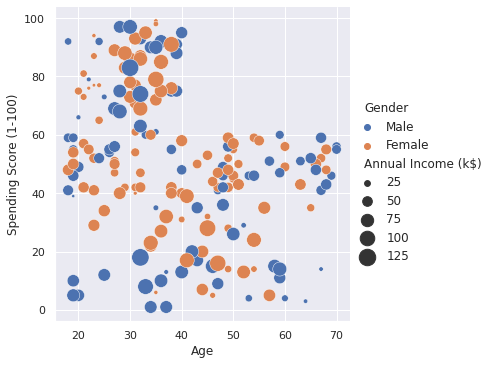

In [27]:
sns.relplot(x=df['Age'],y=df['Spending Score (1-100)'],hue=df['Gender'],size=df['Annual Income (k$)'],sizes=(10,300))

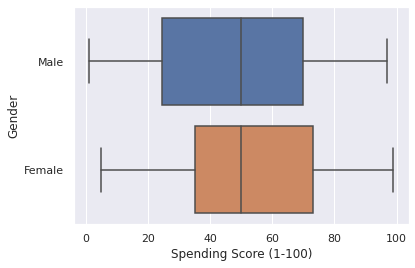

In [36]:
sns.boxplot(x=df['Spending Score (1-100)'],y=df['Gender'])

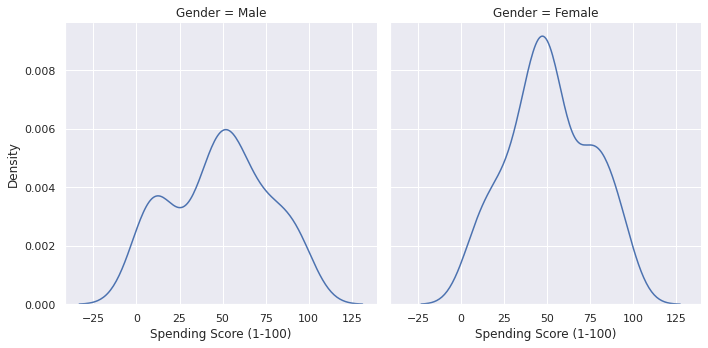

In [37]:
sns.displot(df, x="Spending Score (1-100)", col="Gender", kind="kde")

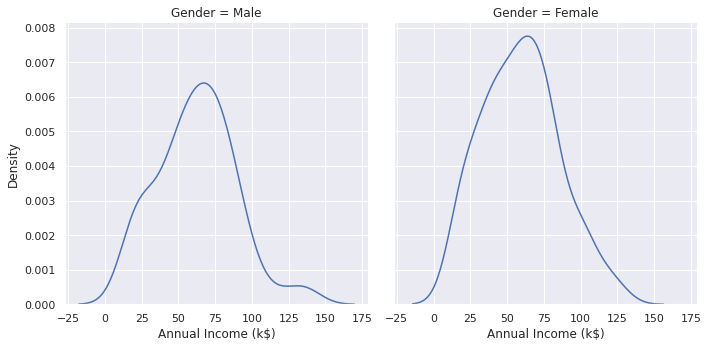

In [49]:
sns.displot(df, x="Annual Income (k$)", col="Gender",kind="kde")

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.neighbors import DistanceMetric

In [59]:
#Kmeans requires normalization as its sensitive to both mean and variance
numerical_data = ['Age', 'Spending Score (1-100)', 'Annual Income (k$)']
df_normalized = normalize(df[numerical_data])

In [61]:
df_normalized = pd.DataFrame(df_normalized, columns=numerical_data)

In [62]:
df_normalized = pd.concat([df_normalized,df[['Gender']]],axis=1)

In [63]:
X = df_normalized[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].iloc[: , :].values

In [64]:
X.shape

(200, 3)

In [66]:
k = 30
repetion = []

for i in range(1,k+1):
  algo = (KMeans(n_clusters=i,
                init='k-means++',
                n_init = i,
                algorithm = "full"))
  algo.fit(X)
  repetion.append(algo.inertia_)

Text(0, 0.5, 'Variance')

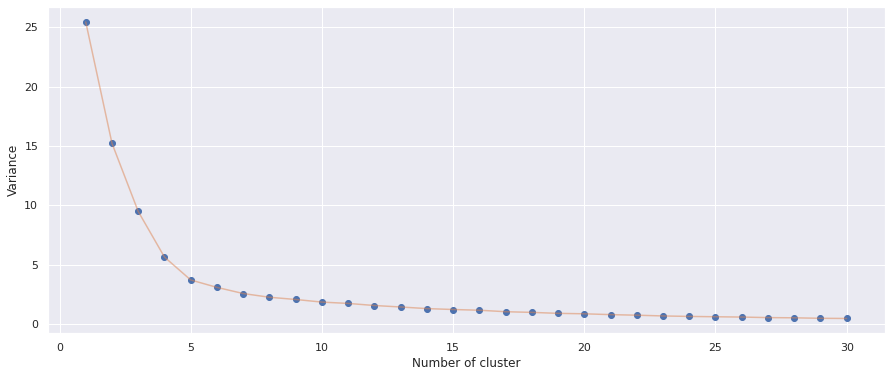

In [72]:
import numpy as np
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1,k+1),repetion,'o')
plt.plot(np.arange(1,k+1),repetion,'-',alpha=0.5)
plt.xlabel('Number of cluster')
plt.ylabel('Variance')

In [105]:
k_cluster1 = (KMeans(n_clusters = 7
                    ,init='k-means++'
                    ,n_init = k 
                    ,max_iter=300
                    ,tol=0.0001
                    ,random_state= 123  
                    ,algorithm='full') )
k_cluster1.fit(X)
centroids = algo.cluster_centers_

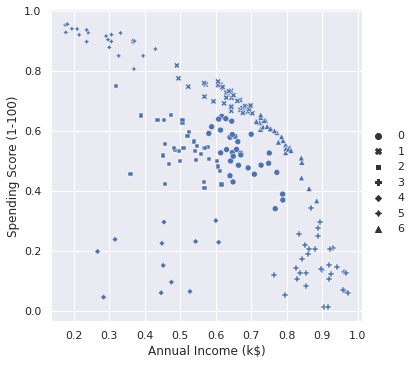

In [81]:
sns.relplot(x=df_normalized['Annual Income (k$)'],y=df_normalized['Spending Score (1-100)'],style=k_cluster.labels_)

In [95]:
k_cluster = (KMeans(n_clusters = 5
                    ,init='k-means++'
                    ,n_init = k 
                    ,max_iter=300
                    ,tol=0.0001
                    ,random_state= 123  
                    ,algorithm='full') )
k_cluster.fit(X)
centroids = algo.cluster_centers_

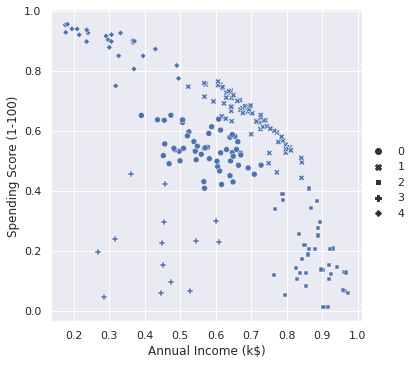

In [83]:
sns.relplot(x=df_normaliazed['Annual Income (k$)'],y=df_normalized['Spending Score (1-100)'],style=k_cluster.labels_)

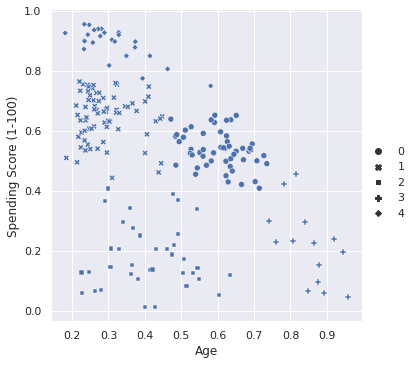

In [85]:
sns.relplot(x=df_normalized['Age'],y=df_normalized['Spending Score (1-100)'],style=k_cluster.labels_)

In [107]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [97]:
silhouette_score(X,k_cluster.labels_,metric="euclidean")

0.5435000932824922

In [100]:
silhouette_score(X,k_cluster1.labels_,metric="euclidean")

0.5159774924113956

In [103]:
calinski_harabasz_score(X,k_cluster.labels_)

285.8932987507388

In [106]:
calinski_harabasz_score(X,k_cluster1.labels_)

287.27239836700096

In [108]:
davies_bouldin_score(X,k_cluster.labels_)

0.5777131980780104

In [109]:
davies_bouldin_score(X,k_cluster1.labels_)

0.6985902086607514